## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

|Alunos                |Matrícula  |
|----------------------|-----------|
|Caio Bertoldo         |2215080050 |
|Danilo Jorge          |2215080007 |
|Diogo Gomes           |2215080033 |
|Guilherme Montenegro  |2215080011 |
|Leonardo Abinader     |2215080042 |
|Rodolfo Simões        |2215080073 |

### Explorando a base de dados: Hábitos de estudantes e performance acadêmica.

Este conjunto de dados sintéticos simula os comportamentos acadêmicos e de estilo de vida de 80.000 estudantes, incluindo diversas características como hábitos de estudo, saúde mental, histórico familiar, motivação e fatores ambientais. O objetivo é explorar como diferentes variáveis ​​afetam o desempenho dos alunos em termos de GPA e notas em exames.

O conjunto de dados foi gerado sinteticamente usando Python com modelagem estatística realista, distribuições gaussianas, lógica condicional e heurística para simular o comportamento real dos alunos e os resultados acadêmicos.

**ISENÇÃO DE RESPONSABILIDADE**: Este é um conjunto de dados sintético destinado apenas a fins educacionais e de pesquisa. Não contém dados reais de alunos.

Link da base dados utilizada: https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset/data

In [214]:
# Reservado para importação das bibliotecas:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

### Verificando as informações do Dataset:

In [215]:
# Abrindo a base de dados:
df = pd.read_csv("student_habits_performance.csv")

In [216]:
# Visualizando os 10 primeiros exemplos:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [217]:
# Quantidade de exemplos:
df.shape

(1000, 16)

In [218]:
# Visualizando os atributos e quais seus tipos:
df.info(memory_usage = False, show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   student_id                     object 
 1   age                            int64  
 2   gender                         object 
 3   study_hours_per_day            float64
 4   social_media_hours             float64
 5   netflix_hours                  float64
 6   part_time_job                  object 
 7   attendance_percentage          float64
 8   sleep_hours                    float64
 9   diet_quality                   object 
 10  exercise_frequency             int64  
 11  parental_education_level       object 
 12  internet_quality               object 
 13  mental_health_rating           int64  
 14  extracurricular_participation  object 
 15  exam_score                     float64
dtypes: float64(6), int64(3), object(7)

In [219]:
# Verificando quais atributos possuem dados faltantes:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [220]:
df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [221]:
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [222]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [223]:
# Verificando se existe dados duplicados:
df.duplicated().sum()

0

In [224]:
df.drop('student_id', axis = 1, inplace = True)
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Visualizando o Dataset:

In [225]:
# Coletando o nome das colunas categóricas:
cat_col_df = df.select_dtypes(include = 'object')
cat_col = [col for col in cat_col_df.columns]
cat_col

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

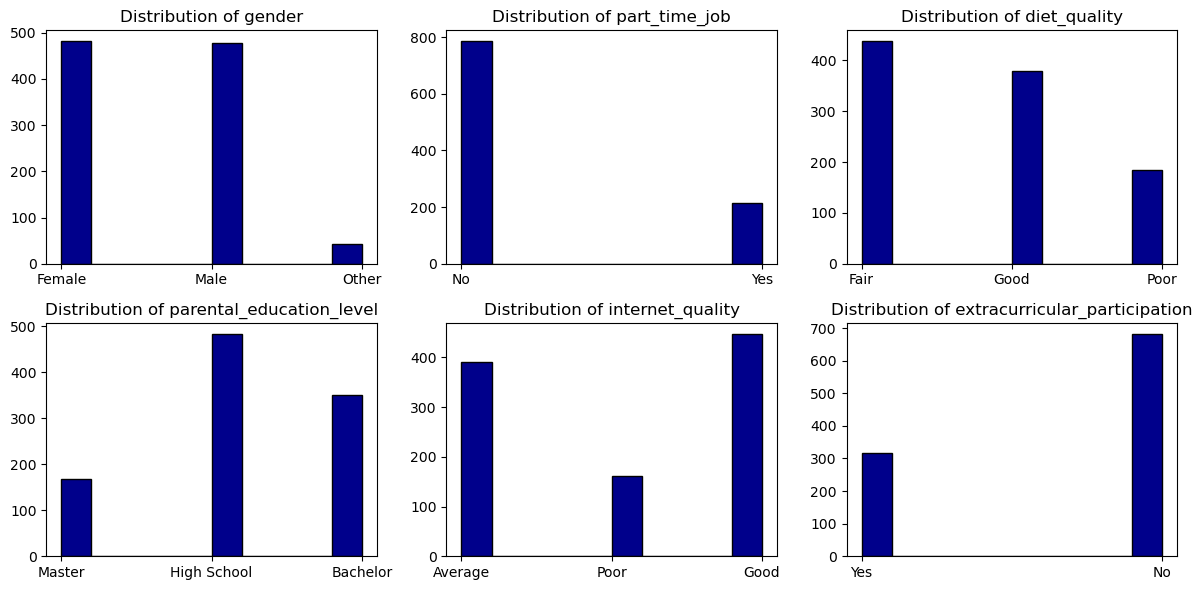

In [226]:
# Visualizando a distribuição dos dados categóricos:
plt.figure(figsize = (12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[cat_col[i]], color = 'darkblue', edgecolor = 'black')
    plt.title(f'Distribution of {cat_col[i]}')
    
plt.tight_layout()
plt.show()

In [227]:
# Coletando o nome das colunas numéricas:
num_col_df = df.select_dtypes(exclude = 'object')
num_col = [col for col in num_col_df.columns]
num_col


['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

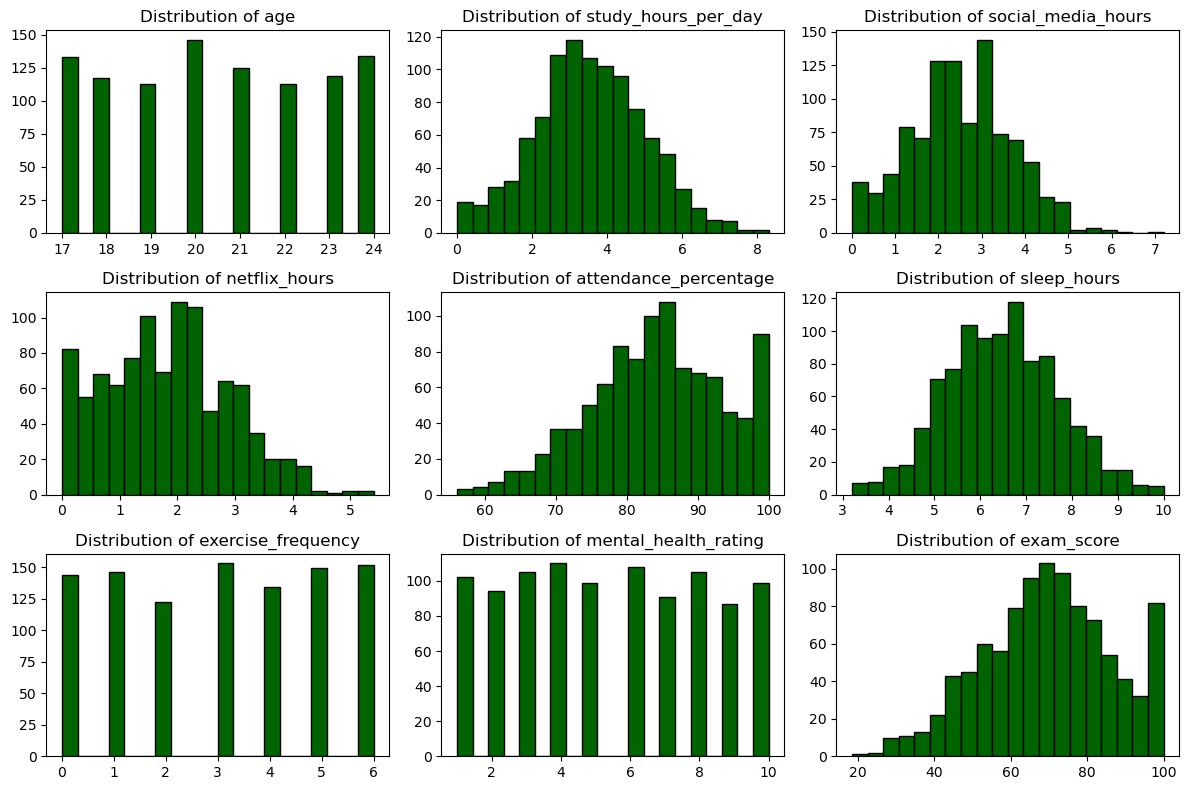

In [228]:
plt.figure(figsize = (12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[num_col[i]], bins = 20, color = 'darkgreen', edgecolor = 'black')
    plt.title(f'Distribution of {num_col[i]}')
    
plt.tight_layout()
plt.show()

In [245]:
print(f"Média de horas gastas por dia em:\n\nEstudo: {df['study_hours_per_day'].mean():.2f}\nRedes Sociais: {df['social_media_hours'].mean():.2f}\nNetflix: {df['netflix_hours'].mean():.2f}")

Média de horas gastas por dia em:

Estudo: 3.55
Redes Sociais: 2.51
Netflix: 1.82


Analisando as distribuições acima, nota-se que as horas médias gastas em redes sociais e netflix ainda são menores que as investidas em estudos. Além disso, constata-se que as horas de sono sinalizam uma distruibuição normal, sendo sua moda = 7 horas.

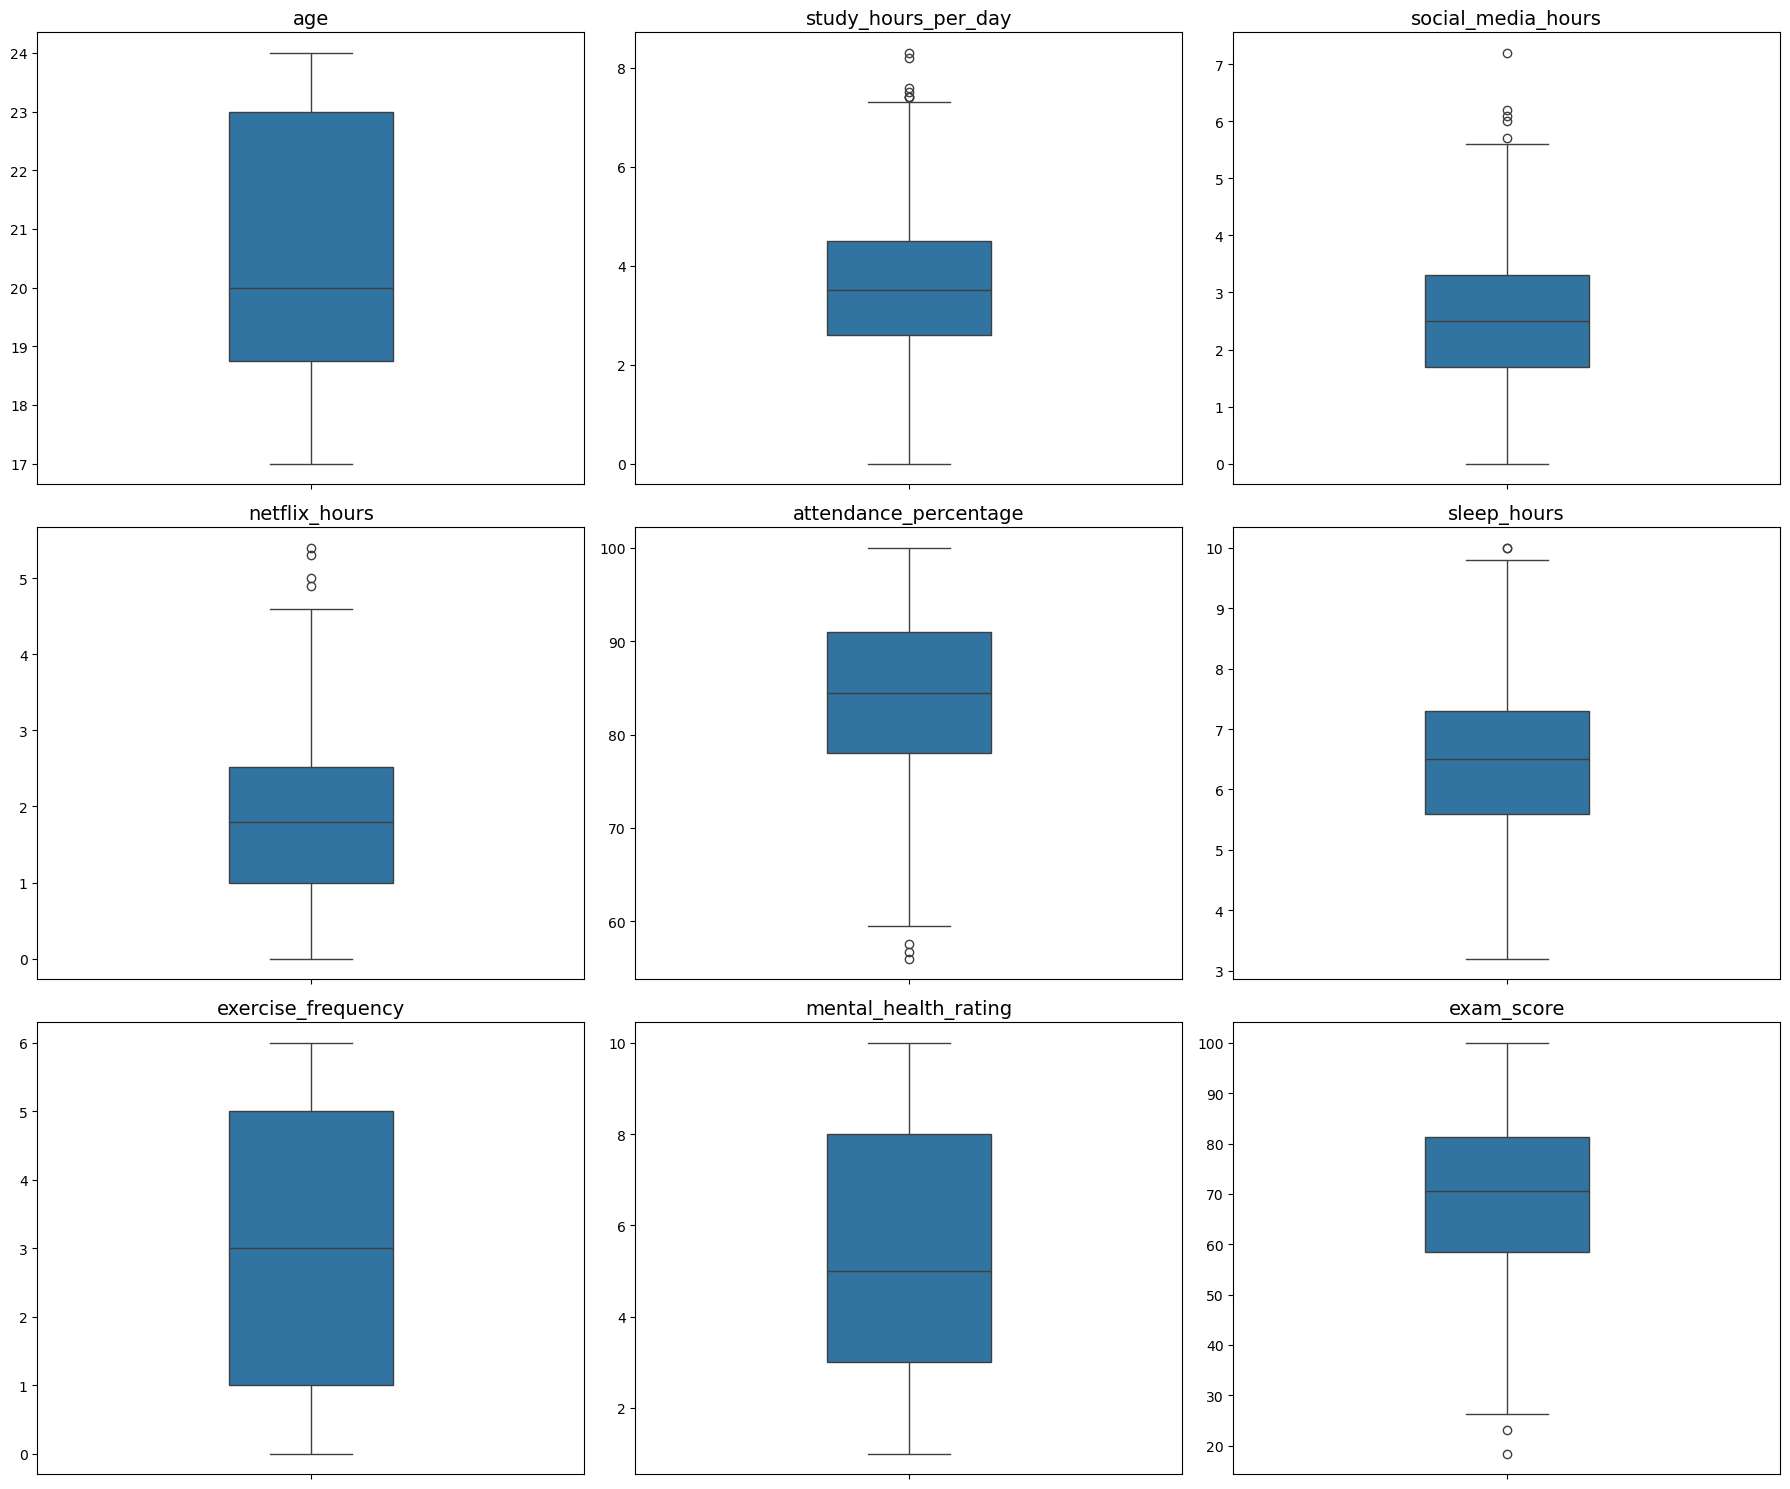

In [229]:
# Definindo layout da grade
cols_por_linha = 3
total_plots = len(num_col)
linhas = (total_plots + cols_por_linha - 1) // cols_por_linha

# Criando subplots
fig, axes = plt.subplots(nrows=linhas, ncols=cols_por_linha, figsize=(18, 5 * linhas))
axes = axes.flatten()

# Loop de plotagem
for i, col in enumerate(num_col):
    sns.boxplot(y = num_col_df[col], ax = axes[i], width = 0.3)
    axes[i].set_title(f'{col}', fontsize = 14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove eixos não usados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [230]:
grafico = px.scatter_matrix(df, dimensions = ['social_media_hours', 'sleep_hours', 'exam_score'], color = 'exam_score')
grafico.show()

Ao analisar os gráficos, observa-se uma relação entre a quantidade de horas gastas nas redes sociais e as notas dos alunos, avaliando que quanto mais tempo se passa nessas redes, menor tende a ser a nota. A relação contrária pode ser inferida à quantidade de sono, tendo um aumento nas notas de maneira diretamente proporcional.

### Transformando atributos categóricos em valores numéricos (One-hot Encoding):

In [231]:
categorical_cols = df.select_dtypes(include = ['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns = categorical_cols)

df_encoded

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Female,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,True,...,False,False,False,False,True,True,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,True,...,True,False,False,True,False,True,False,False,True,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,False,...,False,True,False,True,False,False,False,True,True,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,True,...,False,True,False,False,True,False,True,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,True,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,True,...,False,False,False,True,False,False,True,False,False,True
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,True,...,False,True,False,True,False,True,False,False,False,True
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,False,...,True,False,True,False,False,False,True,False,False,True
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,False,...,False,False,True,False,False,True,False,False,True,False


### Normalização Min-Max:

In [235]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(num_col_df), columns = num_col)

df_final = pd.concat([df_scaled, df_encoded], axis = 1)

df_final

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,age,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,0.857143,0.000000,0.166667,0.203704,0.659091,0.705882,1.000000,0.777778,0.463235,23,...,False,False,False,False,True,True,False,False,False,True
1,0.428571,0.831325,0.388889,0.425926,0.938636,0.205882,1.000000,0.777778,1.000000,20,...,True,False,False,True,False,True,False,False,True,False
2,0.571429,0.168675,0.430556,0.240741,0.881818,0.705882,0.166667,0.000000,0.194853,21,...,False,True,False,True,False,False,False,True,True,False
3,0.857143,0.120482,0.541667,0.185185,0.340909,0.882353,0.666667,0.000000,0.102941,23,...,False,True,False,False,True,False,True,False,False,True
4,0.285714,0.602410,0.611111,0.092593,0.793182,0.250000,0.500000,0.000000,0.588235,19,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.571429,0.313253,0.069444,0.296296,0.477273,0.632353,0.333333,0.555556,0.707108,21,...,False,False,False,True,False,False,True,False,False,True
996,0.000000,0.349398,0.138889,0.444444,0.681818,0.529412,0.166667,0.555556,0.582108,17,...,False,True,False,True,False,True,False,False,False,True
997,0.428571,0.361446,0.361111,0.240741,0.134091,0.485294,0.833333,0.888889,0.563725,20,...,True,False,True,False,False,False,True,False,False,True
998,1.000000,0.650602,0.569444,0.203704,1.000000,0.647059,0.000000,0.000000,0.628676,24,...,False,False,True,False,False,True,False,False,True,False


### Exportando Dataset ajustado para o treinamento do modelo:

In [236]:
df_final.to_csv("df_final.csv", index = False)

In [237]:
df_test = pd.read_csv("df_final.csv")
df_test

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,age.1,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,0.857143,0.000000,0.166667,0.203704,0.659091,0.705882,1.000000,0.777778,0.463235,23,...,False,False,False,False,True,True,False,False,False,True
1,0.428571,0.831325,0.388889,0.425926,0.938636,0.205882,1.000000,0.777778,1.000000,20,...,True,False,False,True,False,True,False,False,True,False
2,0.571429,0.168675,0.430556,0.240741,0.881818,0.705882,0.166667,0.000000,0.194853,21,...,False,True,False,True,False,False,False,True,True,False
3,0.857143,0.120482,0.541667,0.185185,0.340909,0.882353,0.666667,0.000000,0.102941,23,...,False,True,False,False,True,False,True,False,False,True
4,0.285714,0.602410,0.611111,0.092593,0.793182,0.250000,0.500000,0.000000,0.588235,19,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.571429,0.313253,0.069444,0.296296,0.477273,0.632353,0.333333,0.555556,0.707108,21,...,False,False,False,True,False,False,True,False,False,True
996,0.000000,0.349398,0.138889,0.444444,0.681818,0.529412,0.166667,0.555556,0.582108,17,...,False,True,False,True,False,True,False,False,False,True
997,0.428571,0.361446,0.361111,0.240741,0.134091,0.485294,0.833333,0.888889,0.563725,20,...,True,False,True,False,False,False,True,False,False,True
998,1.000000,0.650602,0.569444,0.203704,1.000000,0.647059,0.000000,0.000000,0.628676,24,...,False,False,True,False,False,True,False,False,True,False
